<a href="https://colab.research.google.com/github/Andru-1987/74235-_DataScience_I/blob/main/clase_7/clase_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplos practicos de un modelo de ML

### Clasificacion

Análisis de Churn de Clientes con Machine Learning Supervisado
CHURN -> Utilizando un dataset de Kaggle


In [1]:
dataset_url = "https://raw.githubusercontent.com/Andru-1987/74235-_DataScience_I/refs/heads/main/clase_7/data_store/churn_train.csv"

In [2]:
# Vamos a mirar un poco el dataset -> transformandolo a un formato un poco mas
# amigable : DataFrame
import pandas as pd
df = pd.read_csv(dataset_url)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [4]:
# veamos la cantidad de valores nulos
df.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


#### Entendemos que es una data de muestra
Podemos con esto generar un analisis descriptivo de los mismos y tagear la variable dependiente o `VD`


In [5]:
target = "churn"

In [6]:
df.describe(include="object").T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [9]:
print(df['churn'].value_counts(normalize=True))

churn
no     0.859294
yes    0.140706
Name: proportion, dtype: float64


Exploracion de datos

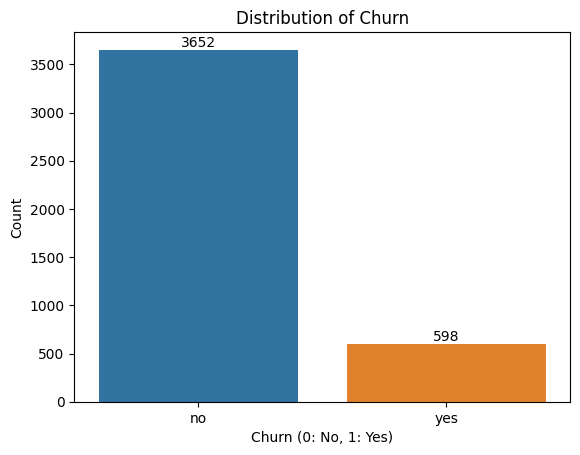

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='churn', hue='churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

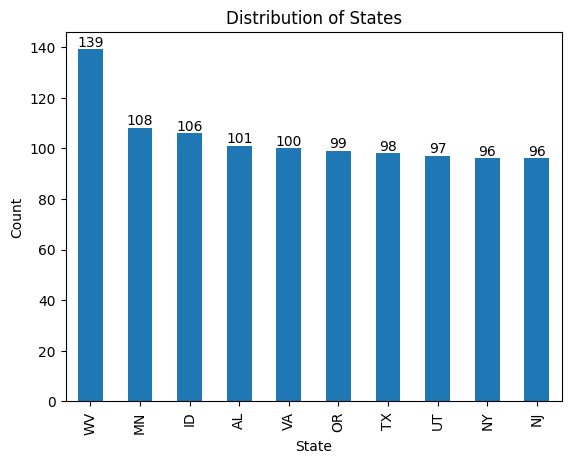

In [13]:
# distribucion por estado

state = df['state'].value_counts()

ax = state[:10].plot(kind='bar')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

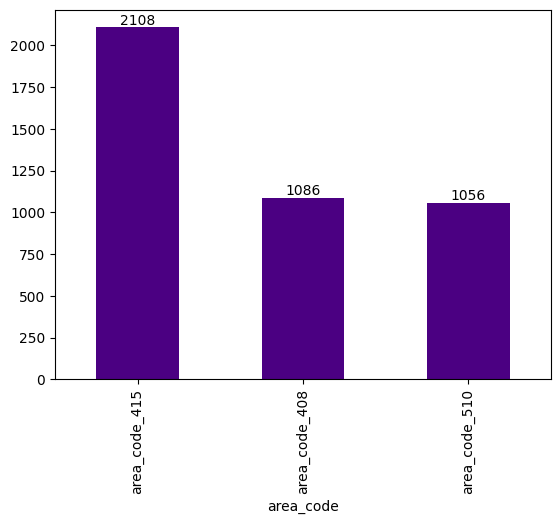

In [14]:
area_code = df['area_code'].value_counts()
ax = area_code.plot(kind='bar', color='indigo')
ax.bar_label(ax.containers[0], fontsize=10);


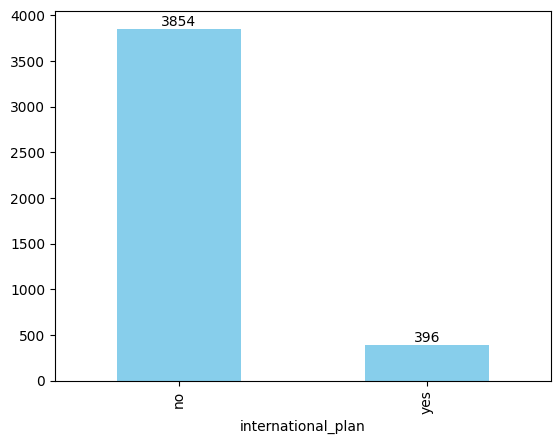

In [15]:
international_plan = df['international_plan'].value_counts()
ax = international_plan.plot(kind='bar', color='skyblue')
ax.bar_label(ax.containers[0], fontsize=10);



Distribucion con datos NO categoricos

In [18]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [19]:
train_num = df.select_dtypes(include = ['float64', 'int64'])
train_num.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


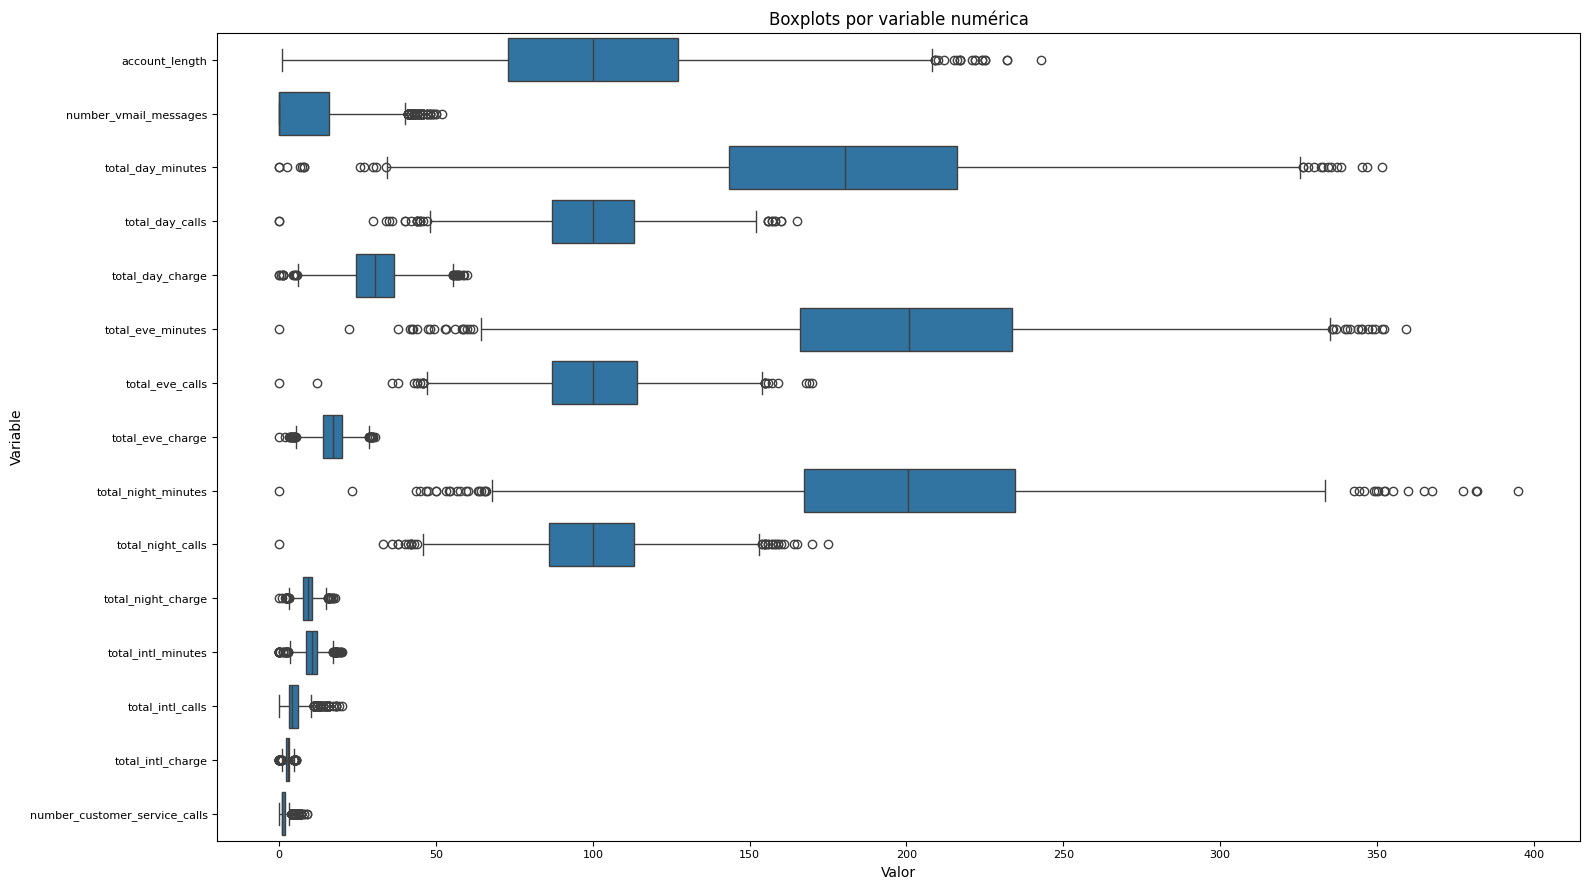

In [24]:
# train_num.plot(kind='box', subplots=True, layout=(5, 4), figsize=(16, 20), fontsize=8)

# Derretimos el DataFrame para usarlo con seaborn
train_num_melted = train_num.melt(var_name="Variable", value_name="Valor")

plt.figure(figsize=(16, 9))
sns.boxplot(data=train_num_melted, x="Valor", y="Variable", orient="h")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Boxplots por variable numérica", fontsize=12)
plt.tight_layout()
plt.show()

### Regressio